In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
current_dir = os.getcwd()

In [4]:
# Construct the relative path to the CSV file
relative_path = os.path.join(current_dir, '../data/flights_data.csv')
csv_path = os.path.normpath(relative_path)

In [96]:
df_train = pd.read_csv(csv_path)
df_train = df_train[df_train['Page'].astype(str).str.lower() == 'expedia']
df_train['Price'].replace(r"\D+", "", regex=True, inplace=True)
df_train.loc[df_train['Stop over'] == '1 escala', 'Stop over'] = '1'
df_train.loc[df_train['Stop over'] == '2 escalas', 'Stop over'] = '2'
df_train.loc[df_train['Stop over'] == 'Vuelo sin escalas', 'Stop over'] = '0'
df_train['Price'] = df_train['Price'].astype(int)
df_train['Days to date'] = df_train['Days to date'].astype(int)

C:\Users\Danie\AppData\Local\Temp\ipykernel_19332\3451338274.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Price'].replace(r"\D+", "", regex=True, inplace=True)
C:\Users\Danie\AppData\Local\Temp\ipykernel_19332\3451338274.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['Stop over'] == '1 escala', 'Stop over'] = '1

In [97]:
df_train.tail(5)

,Price,Flight time,Stop over,Stop over place,Airline,Departure time,Date of flight,Destination place,Origin place,Airline 1,Airline 2,Airline 3,Flight type,Class,Days to date,Day of week,Page
8245,30771,24 h,1,7 h 34 min en SFO,United operado por United y All Nippon Airways,13:50:00,2025-12-30,Tokio (HND),Ciudad de México (MEX),NaN,NaN,NaN,Day flight,Económica,329,Tuesday,Expedia
8246,24414,23 h 50 min,2,2 h 10 min en YYZ and 1 h 31 min en YVR,Air Canada,01:10:00,2025-12-30,Tokio (NRT),Ciudad de México (MEX),NaN,NaN,NaN,Night flight,Económica,329,Tuesday,Expedia
8247,39022,17 h 45 min,1,1 h 14 min en SFO,United,06:05:00,2025-12-30,Tokio (HND),Ciudad de México (MEX),NaN,NaN,NaN,Morning flight,Económica,329,Tuesday,Expedia
8248,39022,17 h 55 min,1,1 h 39 min en SFO,United,06:05:00,2025-12-30,Tokio (NRT),Ciudad de México (MEX),NaN,NaN,NaN,Morning flight,Económica,329,Tuesday,Expedia
8249,39022,18 h 25 min,1,1 h 56 min en IAH,United,05:45:00,2025-12-30,Tokio (NRT),Ciudad de México (MEX),NaN,NaN,NaN,Morning flight,Económica,329,Tuesday,Expedia


In [98]:
df_train['Airline'].unique()

array(['Aerolíneas múltiples', 'All Nippon Airways',
       'Japan Airlines operado por Aeromexico', 'Air Canada',
       'Turkish Airlines', 'United',
       'Japan Airlines operado por American Airlines',
       'Aerolíneas múltiples operado por United',
       'American Airlines operado por American Airlines y Japan Airlines',
       'American Airlines', 'Emirates',
       'United operado por United y All Nippon Airways',
       'Japan Airlines operado por American Airlines y Japan Airlines',
       'Iberia', 'Aeromexico',
       'All Nippon Airways operado por United y All Nippon Airways',
       'KLM operado por Aeromexico y KLM',
       'Aerolíneas múltiples operado por American Airlines',
       'All Nippon Airways operado por United',
       'Aerolíneas múltiples operado por Air Canada y STARFLYER',
       'Aerolíneas múltiples operado por Air Canada y Air Nippon Network',
       'Aerolíneas múltiples operado por United y STARFLYER', 'KLM',
       'Air France',
       'Aerolíne

In [100]:
grouped_df_stop_over = df_train.groupby('Stop over')['Price'].mean().reset_index()
grouped_df_stop_over = grouped_df_stop_over.sort_values(by='Price', ascending=False)
grouped_df_flight_type = df_train.groupby('Flight type')['Price'].mean().reset_index()
grouped_df_flight_type = grouped_df_flight_type.sort_values(by='Price', ascending=False)
grouped_df_day_week = df_train.groupby('Day of week')['Price'].mean().reset_index()
grouped_df_day_week = grouped_df_day_week.sort_values(by='Price', ascending=False)
grouped_df_destination = df_train.groupby('Destination place')['Price'].mean().reset_index()
grouped_df_destination = grouped_df_destination.sort_values(by='Price', ascending=False)
grouped_df_days_to = df_train.groupby('Days to date')['Price'].mean().reset_index()
grouped_df_days_to = grouped_df_days_to.sort_values(by='Days to date', ascending=False)

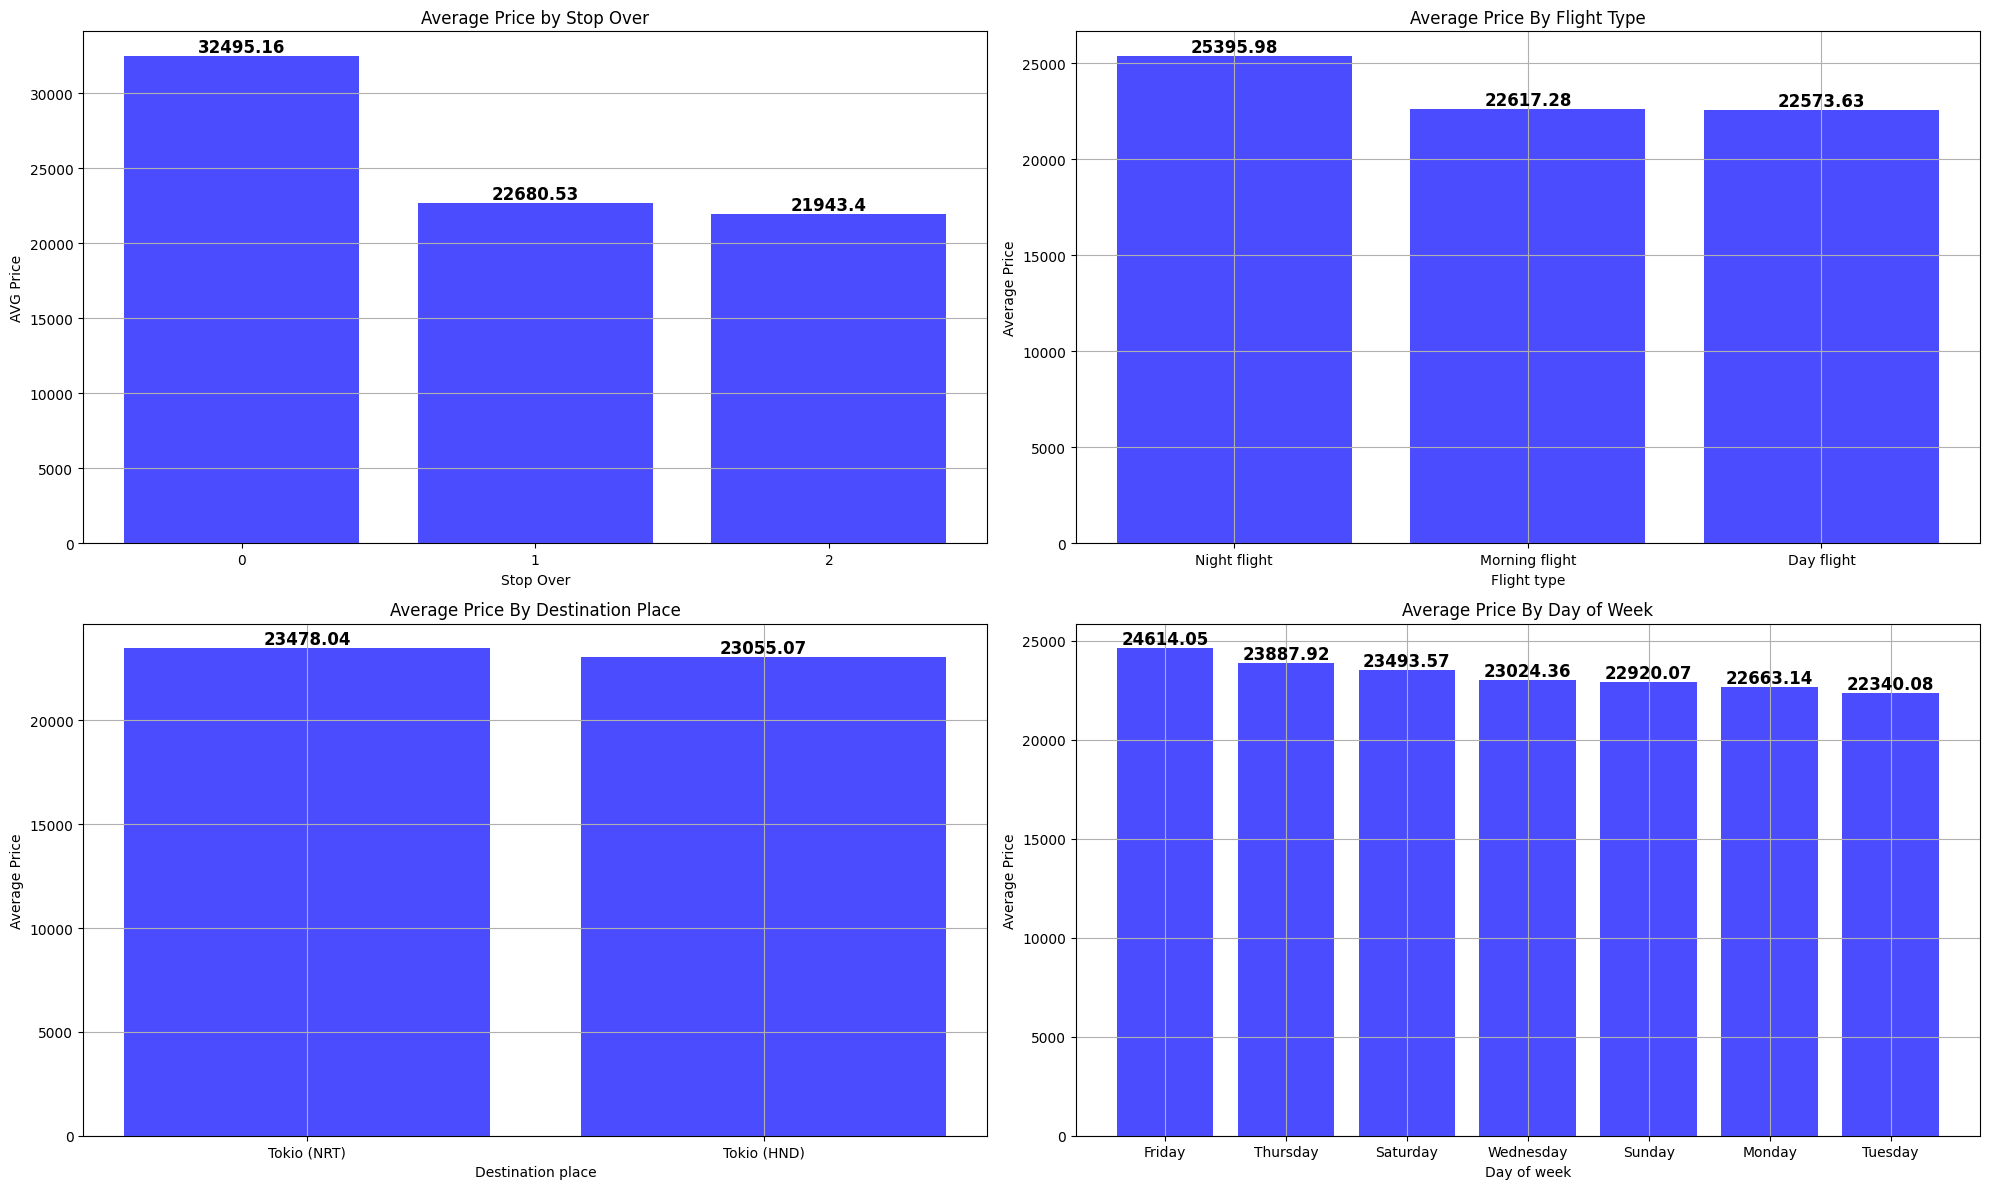

In [90]:
def add_labels(bars, ax):
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            yval + 2,  # Add some padding to the label
            round(yval, 2), 
            ha='center', 
            va='bottom',
            fontsize=12,  # Set font size
            color='black',  # Set font color
            fontweight='bold'  # Set font weight
        )

fig, axs = plt.subplots(2, 2, figsize=(20, 12))  # 2 rows, 1 column

# Bar chart for price by stop over
bar = axs[0,0].bar(grouped_df_stop_over['Stop over'].astype(str), grouped_df_stop_over['Price'], color='b', alpha=0.7)
axs[0,0].set_title('Average Price by Stop Over')
axs[0,0].set_xlabel('Stop Over')
axs[0,0].set_ylabel('AVG Price')
axs[0,0].grid(axis='y')

add_labels(bar, axs[0, 0])

# Line chart for duration by stop over
bar = axs[0,1].bar(grouped_df_flight_type['Flight type'] ,grouped_df_flight_type['Price'], color='b', alpha=0.7)
axs[0,1].set_title('Average Price By Flight Type')
axs[0,1].set_xlabel('Flight type')
axs[0,1].set_ylabel('Average Price')
axs[0,1].grid(True)
add_labels(bar, axs[0, 1])

bar = axs[1,1].bar(grouped_df_day_week['Day of week'] ,grouped_df_day_week['Price'], color='b', alpha=0.7)
axs[1,1].set_title('Average Price By Day of Week')
axs[1,1].set_xlabel('Day of week')
axs[1,1].set_ylabel('Average Price')
axs[1,1].grid(True)
add_labels(bar, axs[1, 1])

bar = axs[1,0].bar(grouped_df_destination['Destination place'] ,grouped_df_destination['Price'], color='b', alpha=0.7)
axs[1,0].set_title('Average Price By Destination Place')
axs[1,0].set_xlabel('Destination place')
axs[1,0].set_ylabel('Average Price')
axs[1,0].grid(True)
add_labels(bar, axs[1, 0])

# Display the chart
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


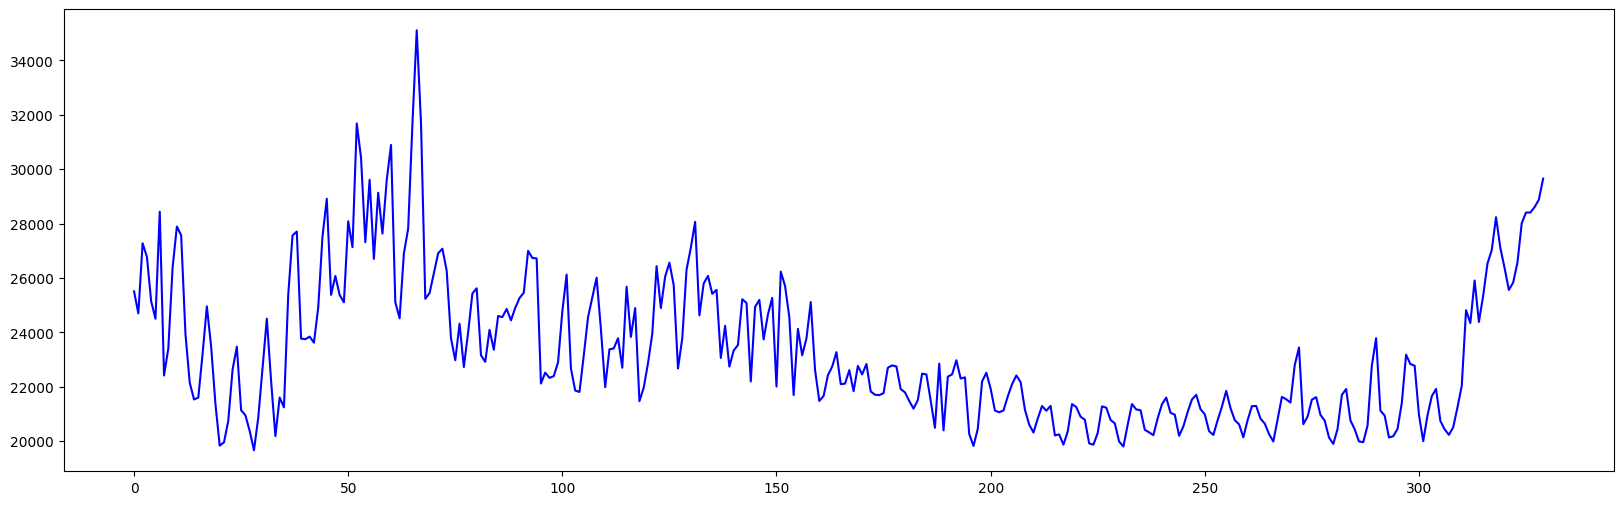

In [106]:
plt.figure(figsize=(20, 6))

plt.plot(grouped_df_days_to['Days to date'], grouped_df_days_to['Price'], color='b', linestyle='-', label='Line 1 (solid)')

IQR: 590.0
lower_bound: -700.0
upper_bound: 1660.0
Outliers:
     Price
13   1700


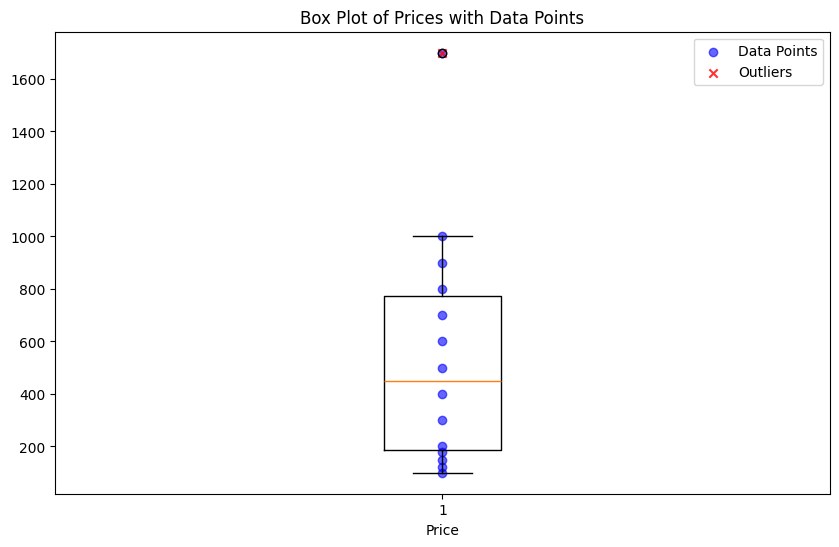

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data
data = {
    'Price': [100, 150, 200, 120, 180, 300, 400, 500, 600, 700, 800, 900, 1000,1700]
}
df = pd.DataFrame(data)

# Create a box plot to visualize outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df['Price'], vert=True)
plt.title('Box Plot of Prices with Data Points')
plt.xlabel('Price')

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile range

# Define outlier criteria
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("IQR:", IQR)
print("lower_bound:", lower_bound)
print("upper_bound:", upper_bound)

# Identify outliers
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
print("Outliers:\n", outliers)

# Plot all data points
plt.scatter( np.ones(len(df)),df['Price'], color='blue', alpha=0.6, label='Data Points')

# Highlight the outliers
plt.scatter( np.ones(len(outliers)),outliers['Price'], color='red', alpha=0.8, label='Outliers', marker='x')

# Add legend
plt.legend()

# Display the chart
plt.show()

Hello World
Hello World


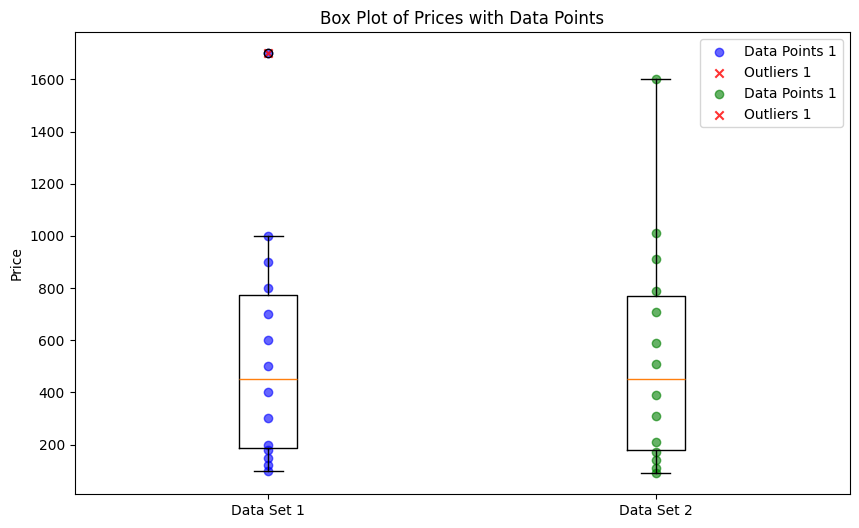

In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data
data1 = {
    'Price': [100, 150, 200, 120, 180, 300, 400, 500, 600, 700, 800, 900, 1000, 1700]
}
data2 = {
    'Price': [90, 140, 210, 110, 170, 310, 390, 510, 590, 710, 790, 910, 1010, 1600]
}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

fig, ax = plt.subplots(figsize=(10, 6))

# Create box plots for multiple sets of prices
positions = [1, 2]  # Positions for the box plots
ax.boxplot([df1['Price'], df2['Price']], positions=positions, vert=True)

ax.set_title('Box Plot of Prices with Data Points')
ax.set_ylabel('Price')
ax.set_xticks(positions)
ax.set_xticklabels(['Data Set 1', 'Data Set 2'])




def example(df,position):
    colors = ['blue', 'green']
    print("Hello World")
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the first set of prices
    Q1_1 = df['Price'].quantile(0.25)
    Q3_1 = df['Price'].quantile(0.75)
    IQR_1 = Q3_1 - Q1_1  # Interquartile range

    # Define outlier criteria for the first set of prices
    lower_bound_1 = Q1_1 - 1.5 * IQR_1
    upper_bound_1 = Q3_1 + 1.5 * IQR_1

    # Identify outliers for the first set of prices
    outliers_1 = df[(df['Price'] < lower_bound_1) | (df['Price'] > upper_bound_1)]

    # Plot all data points for the first set of prices
    ax.scatter(np.ones(len(df)) * positions[position], df['Price'], color=colors[position], alpha=0.6, label='Data Points 1')

    # Highlight the outliers for the first set of prices
    ax.scatter(np.ones(len(outliers_1)) * positions[position], outliers_1['Price'], color='red', alpha=0.8, label='Outliers 1', marker='x')

example(df1,0)
example(df2,1)
'''# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the first set of prices
Q1_1 = df1['Price'].quantile(0.25)
Q3_1 = df1['Price'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1  # Interquartile range

# Define outlier criteria for the first set of prices
lower_bound_1 = Q1_1 - 1.5 * IQR_1
upper_bound_1 = Q3_1 + 1.5 * IQR_1

# Identify outliers for the first set of prices
outliers_1 = df1[(df1['Price'] < lower_bound_1) | (df1['Price'] > upper_bound_1)]

# Plot all data points for the first set of prices
ax.scatter(np.ones(len(df1)) * positions[0], df1['Price'], color='blue', alpha=0.6, label='Data Points 1')

# Highlight the outliers for the first set of prices
ax.scatter(np.ones(len(outliers_1)) * positions[0], outliers_1['Price'], color='red', alpha=0.8, label='Outliers 1', marker='x')





# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the second set of prices
Q1_2 = df2['Price'].quantile(0.25)
Q3_2 = df2['Price'].quantile(0.75)
IQR_2 = Q3_2 - Q1_2  # Interquartile range

# Define outlier criteria for the second set of prices
lower_bound_2 = Q1_2 - 1.5 * IQR_2
upper_bound_2 = Q3_2 + 1.5 * IQR_2

# Identify outliers for the second set of prices
outliers_2 = df2[(df2['Price'] < lower_bound_2) | (df2['Price'] > upper_bound_2)]

# Plot all data points for the second set of prices
ax.scatter(np.ones(len(df2)) * positions[1], df2['Price'], color='green', alpha=0.6, label='Data Points 2')

# Highlight the outliers for the second set of prices
ax.scatter(np.ones(len(outliers_2)) * positions[1], outliers_2['Price'], color='orange', alpha=0.8, label='Outliers 2', marker='x')'''

# Add legend
ax.legend()

# Display the chart
plt.show()
